In [1]:
import csv
import numpy as np
from numpy import genfromtxt
import pandas as pd
import glob
import random
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
N = '03'
Batch = int(N)

In [3]:
TextFile = glob.glob('../DataGen/HFData/ExpT25C/*.txt')
TextFile.sort()
TextFile = np.delete(TextFile, Batch - 1, 0)

In [4]:
S01 = np.transpose((0,0,0,0,0,0,0,0,0,0))
S05 = np.transpose((0,0,0,0,0,0,0,0,0,0))
S10 = np.transpose((0,0,0,0,0,0,0,0,0,0))

A = genfromtxt('../DataGen/HFData/ExpT25C/Batch'+N+'.txt')
j=0
while j<len(A):
    if A[j][4] == 1 and A[j][5] == 25 and A[j][6] == 0.1:
        S01 = np.vstack((S01,A[j]))
    if A[j][4] == 5 and A[j][5] == 25 and A[j][6] == 0.1:
        S05 = np.vstack((S05,A[j]))
    if A[j][4] == 10 and A[j][5] == 25 and A[j][6] == 0.1:
        S10 = np.vstack((S10,A[j]))
    j=j+1

S01 = np.delete(S01, (0), axis=0)
S05 = np.delete(S05, (0), axis=0)
S10 = np.delete(S10, (0), axis=0)

In [5]:
Vis01 = np.log10(S01.reshape((-1,1))[9::10])
Shr01 = np.log10(S01.reshape((-1,1))[8::10])

Vis05 = np.log10(S05.reshape((-1,1))[9::10])
Shr05 = np.log10(S05.reshape((-1,1))[8::10])

Vis10 = np.log10(S10.reshape((-1,1))[9::10])
Shr10 = np.log10(S10.reshape((-1,1))[8::10])

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


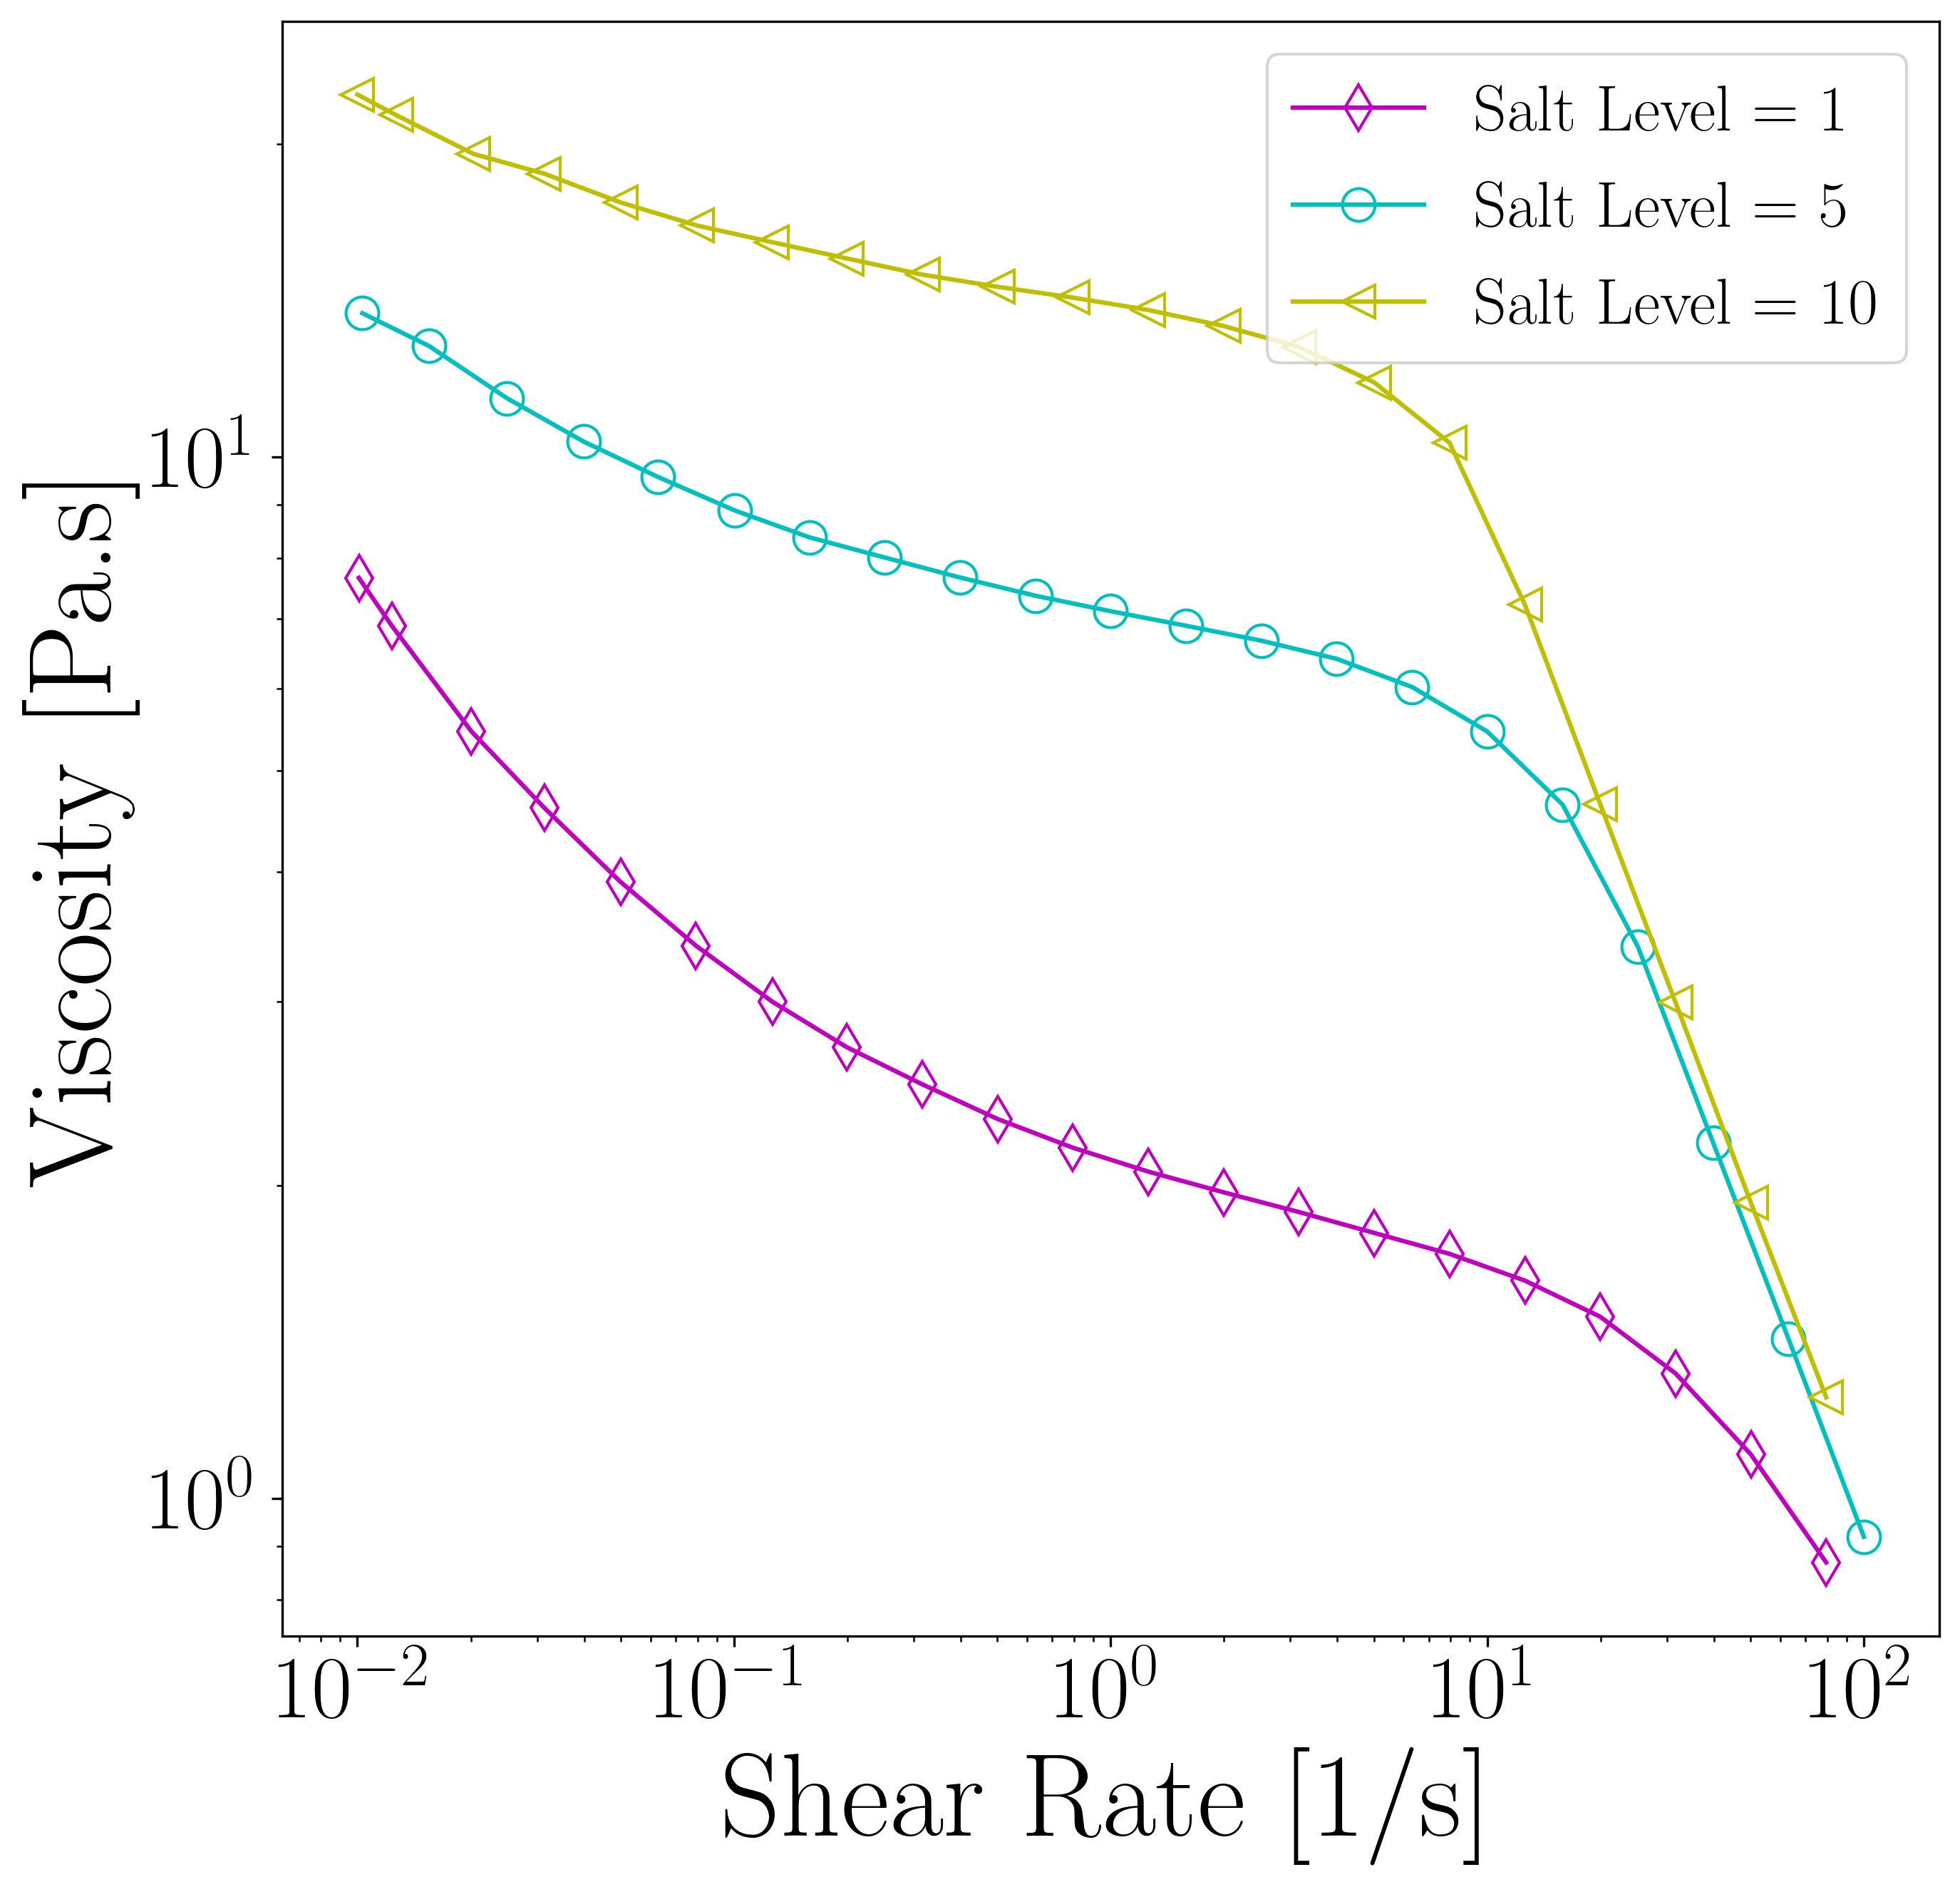

In [7]:
Batch = 5
a=0
b=2
import matplotlib.font_manager
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

plt.figure(figsize=(10,10),dpi=300)

plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=22)    # legend fontsize
plt.rc('figure', titlesize=22)  # fontsize of the figure title

plt.plot(np.power(10,Shr01[1::2]),np.power(10,Vis01[1::2]) , 'md-', markerfacecolor='none', linewidth=1.5, markersize = 11.0)
plt.plot(np.power(10,Shr05[0::2]),np.power(10,Vis05[0::2]) , 'co-', markerfacecolor='none', linewidth=1.5, markersize = 11.0)
plt.plot(np.power(10,Shr10[1::2]),np.power(10,Vis10[1::2]) , 'y<-' , markerfacecolor='none', linewidth=1.5, markersize = 11.0)

plt.xlabel('Shear Rate [1/s]', fontname = 'Times New Roman', fontsize=40)
plt.ylabel('Viscosity [Pa.s]', fontname = 'Times New Roman', fontsize=40)
plt.legend(['Salt Level = 1','Salt Level = 5','Salt Level = 10'],loc='upper right')
#plt.title('Actual and Predicted Flow Curve for a Random Batch')

plt.xticks(np.arange(0,10, 1.0),fontname = "Times New Roman", fontsize=30)
plt.yticks(fontname = "Times New Roman", fontsize=30)
#plt.ylim(0.6,13)
plt.xscale("log")
plt.yscale("log")

plt.savefig('Exp_Salt_Batch03.png',bbox_inches = 'tight')

plt.show()